In [36]:
## Sensitivity Analysis for Phenolic-Coal Crosslinking Project
# The aim is to attempt using the four settings below for sensitivity analysis:
        # Factor prioritisation** - which parameters are most influential?
        # Factor fixing** - which parameters can we ignore?
        # Factor mapping - which inputs matter for just this space in the model output?
        # (Metamodelling) - which parameters can I use to model my model?

# Questions to answer, Can we determine;
        # 1. What is the sensitivity of the model to the input parameters?
        # 2. Which parameters are most influential?
        # 3. Which parameters can be ignored?
        # 4. Which parameters can be mapped to a reduced space?
        # 5. Which parameters can be used to model the model?

# The aim is to attempt these 2 approaches:
    # Local approaches
    # Global approaches

In [42]:
# conda install -c conda-forge ipywidgets
# # pip install ipywidgets

from ipywidgets import widgets, interact
from IPython.display import display
%matplotlib inline
try:
    import seaborn as sbn
except (ModuleNotFoundError, ImportError):
    print("No seaborn")
    sbn = None
import matplotlib.pyplot as plt
import numpy as np
from IPython.core.pylabtools import figsize
figsize(12, 10)
if sbn:
    sbn.set_context("talk", font_scale=1)

No seaborn


In [65]:
## Calculating the molecular weight of coal

'''
Carbon (C):
   - Atomic mass of carbon (C): 12.01 g/mol
   - Moles of carbon = (68.23% / 100) / 12.01 g/mol = 0.05698 mol

Hydrogen (H):
   - Atomic mass of hydrogen (H): 1.008 g/mol
   - Moles of hydrogen = (4.37% / 100) / 1.008 g/mol = 0.04345 mol

Nitrogen (N):
   - Atomic mass of nitrogen (N): 14.01 g/mol
   - Moles of nitrogen = (0.96% / 100) / 14.01 g/mol = 0.0000685 mol

Oxygen (O):
   - Atomic mass of oxygen (O): 16.00 g/mol
   - Moles of oxygen = (17.80% / 100) / 16.00 g/mol = 0.11125 mol

Now, calculate the molar ratio:
C:H:N:O = 0.05698 : 0.04345 : 0.0000685 : 0.11125

Determine the smallest ratio (which corresponds to nitrogen) and normalize the ratios:
C:H:N:O = 1 : 0.7626 : 0.001201 : 1.948

The molecular weight (approximate) is then calculated as:
Molecular Weight = 1 * 12.01 + 0.7626 * 1.008 + 0.001201 * 14.01 + 1.948 * 16.00 =32.61 g/mol

'''


'\nCarbon (C):\n   - Atomic mass of carbon (C): 12.01 g/mol\n   - Moles of carbon = (68.23% / 100) / 12.01 g/mol = 0.05698 mol\n\nHydrogen (H):\n   - Atomic mass of hydrogen (H): 1.008 g/mol\n   - Moles of hydrogen = (4.37% / 100) / 1.008 g/mol = 0.04345 mol\n\nNitrogen (N):\n   - Atomic mass of nitrogen (N): 14.01 g/mol\n   - Moles of nitrogen = (0.96% / 100) / 14.01 g/mol = 0.0000685 mol\n\nOxygen (O):\n   - Atomic mass of oxygen (O): 16.00 g/mol\n   - Moles of oxygen = (17.80% / 100) / 16.00 g/mol = 0.11125 mol\n\nNow, calculate the molar ratio:\nC:H:N:O = 0.05698 : 0.04345 : 0.0000685 : 0.11125\n\nDetermine the smallest ratio (which corresponds to nitrogen) and normalize the ratios:\nC:H:N:O = 1 : 0.7626 : 0.001201 : 1.948\n\nThe molecular weight (approximate) is then calculated as:\nMolecular Weight = 1 * 12.01 + 0.7626 * 1.008 + 0.001201 * 14.01 + 1.948 * 16.00 =32.61 g/mol\n\n'

In [37]:
## Heat of reaction for the total crosslinking reaction for the different rxns -- Experimental data

# 100% phenolic curing reaction
Hrxn_total_100p = 31620 # Total Heat of reaction (100% phenolic) J/mol (from DSC)
Na = 6.022e23 # Avogadro's number 

# Hrxn for a set of phenol-phenol (Hrxn_pp) -- Hrxn_total/Na (J/ph_mol)
Hrxn_pp = Hrxn_total_100p/Na # J/ph_mol
print("Hrxn per phenol-phenol reaction = ", Hrxn_pp)

# Sum of total H_rxn for all phenol-phenol reactions (Hrxn_total_pp)
# Hrxn_total_pp = Hrxn_pp * Na (J/mol)

# Based on the number of phenol molecules in each reaction the heat of reaction for each reaction can be calculated
# n_phenol = mass_phenol/molar_mass_novolac_phenol
mass_phenol = 0.008 # g
molar_mass_novolac_phenol = 600 # g/mol
n_molphen = mass_phenol/molar_mass_novolac_phenol # mol
print("n_molphen = ", n_molphen)

# How many phenol molecules per n_molphen of novolac phenol?
# n_phenol = n_molphen * Avogadro's number
n_phenol = n_molphen * Na # mol
print("n_phenol = ", n_phenol)

# The total Heat of reaction (phenol-phenol links) from simulation 
Hrxn_total_pp = Hrxn_pp * n_phenol # J/mol
print("Hrxn_total_pp = ", Hrxn_total_pp)

# Check with the experimental data
# Hrxn_total_exp = 31620 # J/mol
Hrxn_total_exp = Hrxn_total_100p * n_molphen
print("Hrxn_total_exp = ", Hrxn_total_exp)


'''
This code calculates the heat of reaction for simulation of phenol-phenol crosslinking reaction
This calculation is based on certain assumptions from the experimental data

Assumptions:
    1. The total heat of reaction for the phenol-phenol crosslinking reaction is the same as the total heat of reaction for the 100% phenolic curing reaction
    2. Hence we can divide the total heat of reaction by the Avogadros number (Na), to get the heat of reaction for each phenol-phenol atomic reaction
    3. The heat of reaction for each phenol-phenol atomic reaction is the same
    4. The total heat of reaction in the simulation is estimated by the total number of phenol-phenol crosslinks that are formed.

The final calculated total heat of reaction (Hrxn) is estimated in Joules (J)

'''

# 60% phenolic - 40% coal curing reaction
Hrxn_total_60p = 23406 # Total Heat of reaction (100% phenolic) J/mol (from DSC)
Na = 6.022e23 # Avogadro's number 

# Hrxn for a set of phenol-coal (Hrxn_pc) -- Hrxn_total_60p/Na (J/ph_mol)
Hrxn_pc = Hrxn_total_60p/Na # J/ph_mol
print("Hrxn per phenol-coal reaction = ", Hrxn_pc)

# Sum of total H_rxn for all phenol-coal reactions (Hrxn_total_pc)
# Hrxn_total_pc = Hrxn_pc * Na (J/mol)

# How many coal molecules per n_molcoal ?
# n_coal = n_molcoal * Avogadro's number
n_coal = n_molcoal * Na # mol
print("n_coal = ", n_coal)

# The total Heat of reaction (phenol-coal links) from simulation 
Hrxn_total_pc = Hrxn_pc * n_coal # J/mol
print("Hrxn_total_pc = ", Hrxn_total_pc)

# Check with the experimental data
# Hrxn_total_exp = 31620 # J/mol
Hrxn_total_exp = Hrxn_total_60p * n_molcoal
print("Hrxn_total_exp = ", Hrxn_total_exp)


Hrxn per phenol-phenol reaction =  5.250747260046496e-20
n_molphen =  1.3333333333333333e-05
n_phenol =  8.029333333333334e+18
Hrxn_total_pp =  0.42160000000000003
Hrxn_total_exp =  0.4216


In [38]:
# Input n_molphenol range of values 
# n_molphenol = np.linspace(0, 1, 100)
n_molphen_values = [1.33e-5, 50, 100, 150, 200, 250, 300, 350, 400, 450, 500]

#Once the n_molphenol is picked, then n_phenol is calculated and the Hrxn_sim is calculated

In [66]:
# Wrapping up the calculation of the heat of reaction into a function

def calculate_Hrxn_pp(n_molphen_values):
    # Constants
    Hrxn_total_100p = 31620  # Total Heat of reaction (100% phenolic) J/mol (from DSC)
    Na = 6.022e23  # Avogadro's number

    results = []

    for n_molphen in n_molphen_values:
        # Calculate Hrxn for a phenol-phenol reaction (Hrxn_pp)
        Hrxn_pp = Hrxn_total_100p / Na  # J/ph_mol

        # Calculate the total number of phenol molecules (n_phenol)
        n_phenol = n_molphen * Na  # mol

        # Calculate the total Heat of reaction for all phenol-phenol reactions
        Hrxn_total_pp = Hrxn_pp * n_phenol  # J/mol

        # Check with experimental data
        Hrxn_total_exp = Hrxn_total_100p * n_molphen

        results.append((n_molphen, Hrxn_total_exp, Hrxn_total_pp))

    return results

# Example usage
n_molphen_values = [1.33e-5, 50, 100, 150, 200, 250, 300]   #   # This is the total number of phenolic resins present in the system
n_molphen_simulated_links = [1.33e-5, 30, 80, 120, 180, 210, 260]   # This is the actual number of phenol-phenol links formed during the simulation
experimental_results = calculate_Hrxn_pp(n_molphen_values)  # This is the expected total Hrxn values based on experimental data
simulated_results = calculate_Hrxn_pp(n_molphen_simulated_links) # This is the calculated total Hrxn based on simulated crosslinks

# Print the experimental results
print("Results based on the crosslinking of the total phenolic resins present in the system:")
for n_molphen, Hrxn_total_exp, Hrxn_total_pp in experimental_results:
    print(f"n_molphen = {n_molphen:.2e} mols, Hrxn_total_exp = {Hrxn_total_exp:.2f} J, Hrxn_total_pp = {Hrxn_total_pp:.2f} J")

# Print the simulated results
print("\nResults based on the actual number of phenol-phenol crosslinks formed in the simulation:")
for result in simulated_results:
    n_molphen_sim, Hrxn_total_exp, Hrxn_total_pp = result
    print(f"n_molphen_sim = {n_molphen_sim:.2e} mols, Hrxn_total_exp = {Hrxn_total_exp:.2f} J, Hrxn_total_pp = {Hrxn_total_pp:.2f} J")


Results based on the crosslinking of the total phenolic resins present in the system:
n_molphen = 1.33e-05 mols, Hrxn_total_exp = 0.42 J, Hrxn_total_pp = 0.42 J
n_molphen = 5.00e+01 mols, Hrxn_total_exp = 1581000.00 J, Hrxn_total_pp = 1581000.00 J
n_molphen = 1.00e+02 mols, Hrxn_total_exp = 3162000.00 J, Hrxn_total_pp = 3162000.00 J
n_molphen = 1.50e+02 mols, Hrxn_total_exp = 4743000.00 J, Hrxn_total_pp = 4743000.00 J
n_molphen = 2.00e+02 mols, Hrxn_total_exp = 6324000.00 J, Hrxn_total_pp = 6324000.00 J
n_molphen = 2.50e+02 mols, Hrxn_total_exp = 7905000.00 J, Hrxn_total_pp = 7905000.00 J
n_molphen = 3.00e+02 mols, Hrxn_total_exp = 9486000.00 J, Hrxn_total_pp = 9486000.00 J

Results based on the actual number of phenol-phenol crosslinks formed in the simulation:
n_molphen_sim = 1.33e-05 mols, Hrxn_total_exp = 0.42 J, Hrxn_total_pp = 0.42 J
n_molphen_sim = 3.00e+01 mols, Hrxn_total_exp = 948600.00 J, Hrxn_total_pp = 948600.00 J
n_molphen_sim = 8.00e+01 mols, Hrxn_total_exp = 2529600.00 

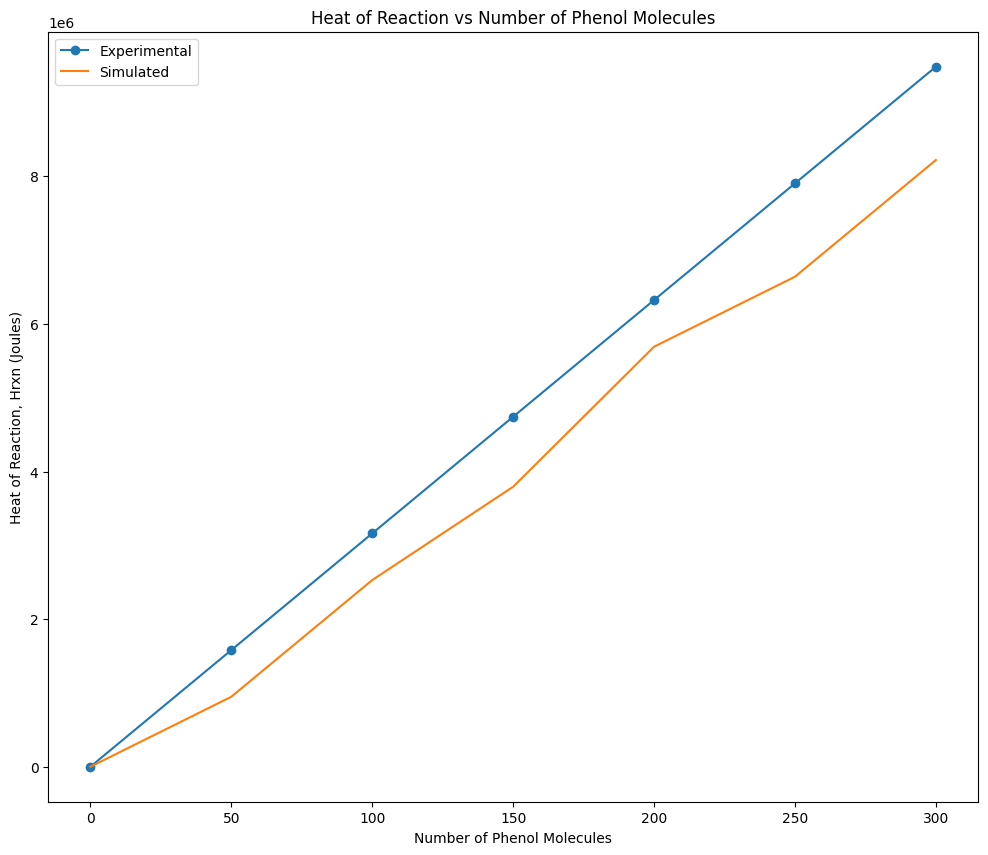

In [57]:
simulated_results = np.array(simulated_results)
experimental_results = np.array(experimental_results)

# Extracting the experimental results
n_molphen_values_exp = experimental_results[:,0]
Hrxn_total_exp_values = experimental_results[:,1]

# Extracting the simulated results
n_molphen_values_sim = simulated_results[:,0]
Hrxn_total_pp_values = simulated_results[:,2]

# Plotting the results
plt.plot(n_molphen_values_exp, Hrxn_total_exp_values, label='Experimental', marker='o')
plt.plot(n_molphen_values_exp, Hrxn_total_pp_values, label='Simulated')

# Add labels and title
plt.xlabel('Number of Phenol Molecules')
plt.ylabel('Heat of Reaction, Hrxn (Joules)')
plt.title('Heat of Reaction vs Number of Phenol Molecules')
plt.legend()
plt.show()

In [59]:
# Constant Input Parameters

Ea = [128, 90, 100, 142] # Activation Energy, KJ/mol
A = [2.34e10, 2.0e10, 2.1e10, 1.8e10] # Pre-exponential Factor
R = 8.314 # Universal Gas Constant, KJ/mol.k

# Assign the values in the Ea list to identifiable variable names
# where pp = phenol-phenol and cp = coal-phenol
# where pp_oo = phenol-phenol_ortho-ortho, pp_op = phenol-phenol_ortho-para, pp_pp = phenol-phenol_para-para

Ea_pp_oo, Ea_pp_op, Ea_pp_pp, Ea_cp = Ea  # Activation Energy for each reaction type
A_pp_oo, A_pp_op, A_pp_pp, A_cp = A # Pre-exponential Factor for each reaction type

print(Ea_pp_oo, Ea_pp_op, Ea_pp_pp, Ea_cp)

# Variable Input Parameters
T = np.linspace(300, 500, 100) # Temperature, K

# Calculating the rate constants for each reaction type
k_pp_oo = A_pp_oo * np.exp(-Ea_pp_oo/(R*T))
k_pp_op = A_pp_op * np.exp(-Ea_pp_op/(R*T))
k_pp_pp = A_pp_pp * np.exp(-Ea_pp_pp/(R*T))
k_cp = A_cp * np.exp(-Ea_cp/(R*T))

Hrxn = [] # Heat of Reaction   


128 90 100 142


In [62]:
# Wrapping up the calculation of the rate constants into a function

def calculate_rate_constants(T):
    # Constants
    Ea = [128, 90, 100, 142] # Activation Energy, KJ/mol
    A = [2.34e10, 2.0e10, 2.1e10, 1.8e10] # Pre-exponential Factor (1/s)
    R = 8.314 # Universal Gas Constant, KJ/mol.k

    # Assign the values in the Ea list to identifiable variable names
    # were pp = phenol-phenol and cp = coal-phenol
    # were pp_oo = phenol-phenol_ortho-ortho, pp_op = phenol-phenol_ortho-para, pp_pp = phenol-phenol_para-para
    Ea_pp_oo, Ea_pp_op, Ea_pp_pp, Ea_cp = Ea  # Activation Energy for each reaction type
    A_pp_oo, A_pp_op, A_pp_pp, A_cp = A # Pre-exponential Factor for each reaction type

    # Calculating the rate constants for each reaction type
    k_pp_oo = A_pp_oo * np.exp(-Ea_pp_oo/(R*T))
    k_pp_op = A_pp_op * np.exp(-Ea_pp_op/(R*T))
    k_pp_pp = A_pp_pp * np.exp(-Ea_pp_pp/(R*T))
    k_cp = A_cp * np.exp(-Ea_cp/(R*T))

    return k_pp_oo, k_pp_op, k_pp_pp, k_cp

# Example usage
T = np.linspace(300, 500, 10) # Temperature, K
k_pp_oo, k_pp_op, k_pp_pp, k_cp = calculate_rate_constants(T)
print(k_pp_oo, k_pp_op, k_pp_pp, k_cp)

[2.22294272e+10 2.23082420e+10 2.23771148e+10 2.24378149e+10
 2.24917153e+10 2.25398979e+10 2.25832265e+10 2.26223995e+10
 2.26579872e+10 2.26904603e+10] [1.92911909e+10 1.93392574e+10 1.93812194e+10 1.94181702e+10
 1.94509569e+10 1.94802458e+10 1.95065682e+10 1.95303532e+10
 1.95519506e+10 1.95716491e+10] [2.01747016e+10 2.02305625e+10 2.02793416e+10 2.03223052e+10
 2.03604347e+10 2.03945024e+10 2.04251245e+10 2.04527985e+10
 2.04779307e+10 2.05008557e+10] [1.70038481e+10 1.70707424e+10 1.71292195e+10 1.71807739e+10
 1.72265659e+10 1.72675104e+10 1.73043383e+10 1.73376407e+10
 1.73679005e+10 1.73955166e+10]


In [ ]:
## Defining the model

## Identifying the inputs: 
    ## Temperature (T), preexponential factor (A), activation energy (Ea), time, t, number of phenol and coal molecules

## Defining the ranges: 
T = [300, 400, 500, 600, 700, 800, 900, 1000] # Kelvin
A = [1e-10, 1e-9, 1e-8, 1e-7] # 1/s
Ea_pp_o = [90] # kJ/mol